In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle

# 1. Load Calibration and Test Images

In [6]:
f = open("../camera_cal/calibration.pkl", 'rb')
ret, mtx, dist, rvecs, tvecs = pickle.load(f)
f.close()

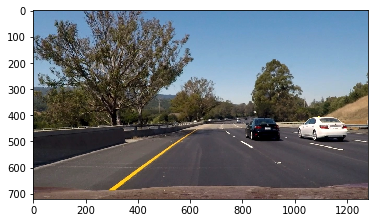

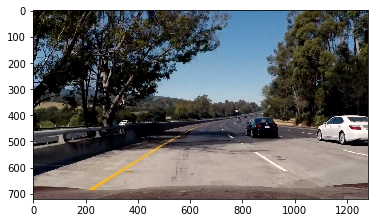

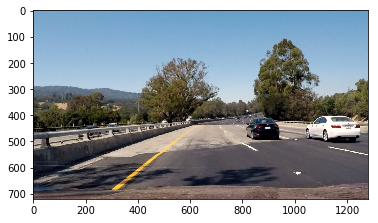

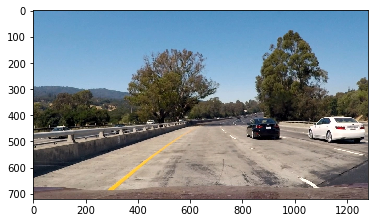

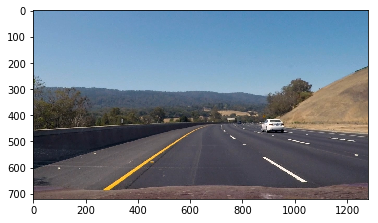

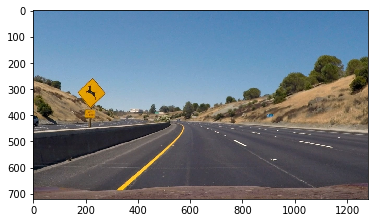

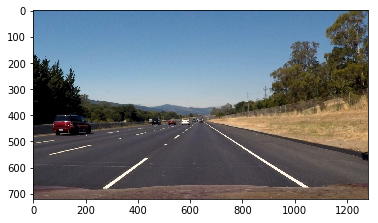

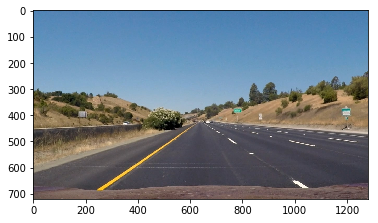

In [7]:
TEST_DIR = glob.glob("../test_images/*.jpg")
for img_link in TEST_DIR:
    img = cv2.cvtColor(cv2.imread(img_link), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

# 2. Correct for Camera Distortion

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


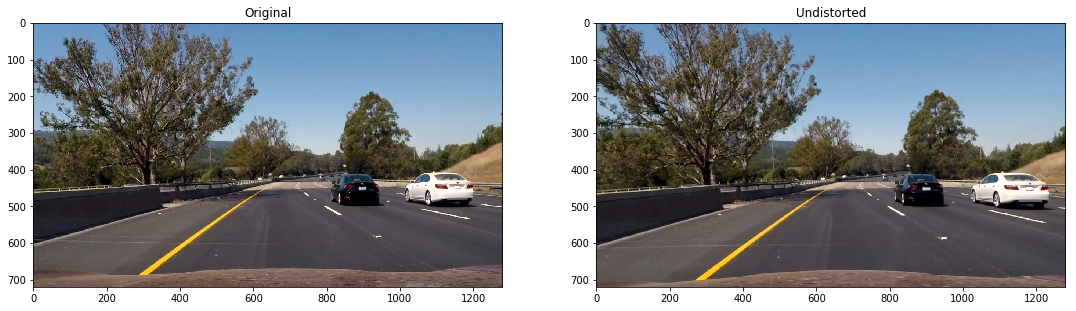

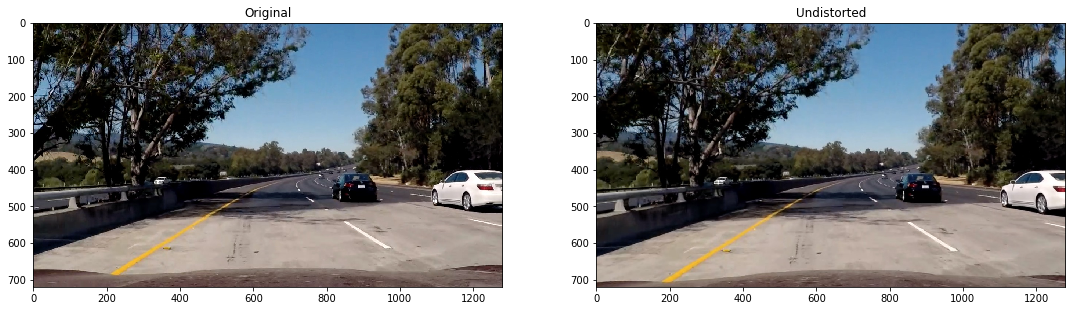

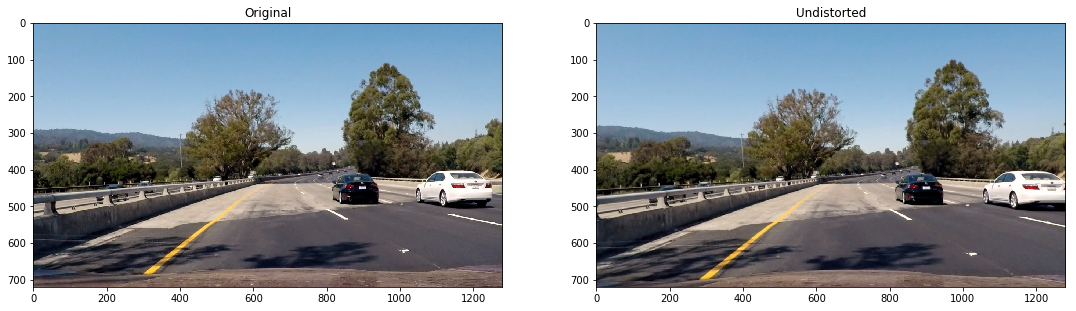

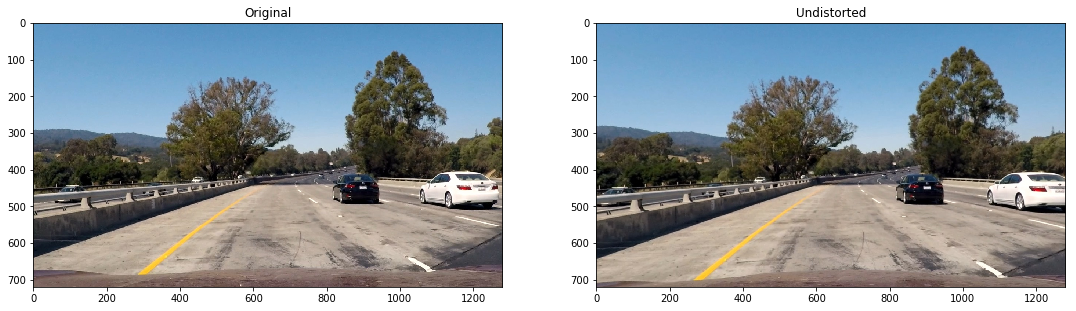

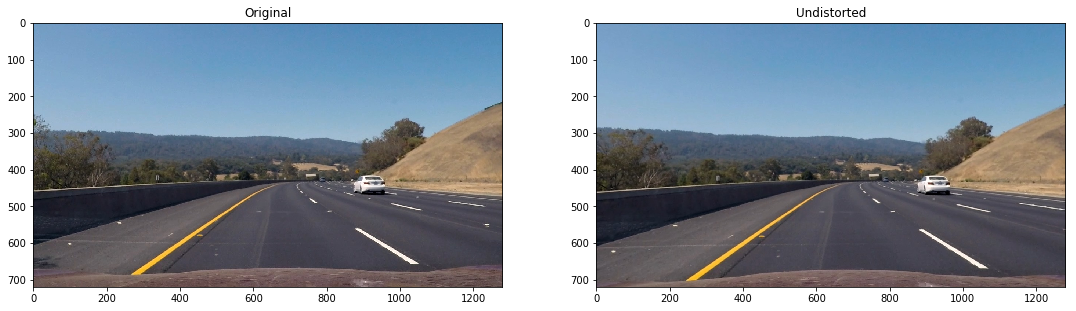

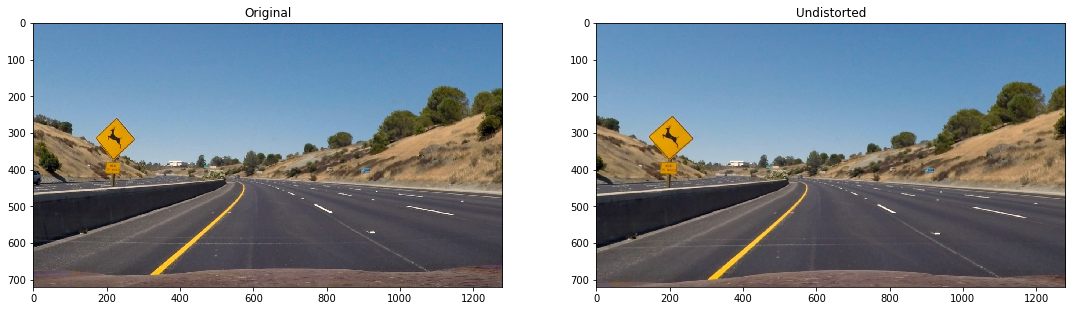

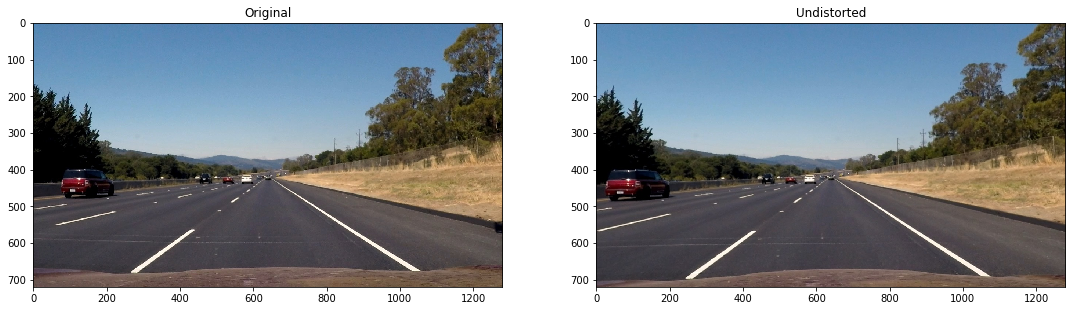

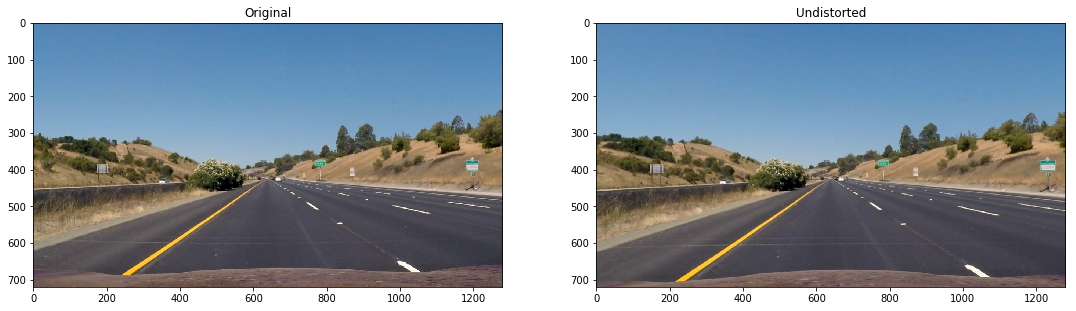

In [8]:
TEST_DIR = glob.glob("../test_images/*.jpg")
for img_link in TEST_DIR:
    f, axarr = plt.subplots(1, 2)
    img = cv2.cvtColor(cv2.imread(img_link), cv2.COLOR_BGR2RGB)
    
    axarr[0].imshow(img)
    axarr[0].set_title("Original")
    
    # undistort 
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    axarr[1].imshow(dst)
    axarr[1].set_title("Undistorted")
    f.set_size_inches(18.5, 10.5, forward=True)
    f.show()

# 3. Create a thresholded binary by filtering by a) gradient magnitude b) gradient direction c) 

In [122]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh_min=0, thresh_max=255):
    
   # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    # Return the binary image
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)): 
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_x = np.absolute(sobelx)
    abs_y = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    dir = np.arctan2(abs_y, abs_x)
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(dir)
    # 6) Return this mask as your binary_output image
    binary_output[(dir >= thresh[0]) & (dir <= thresh[1])] = 1
    return binary_output

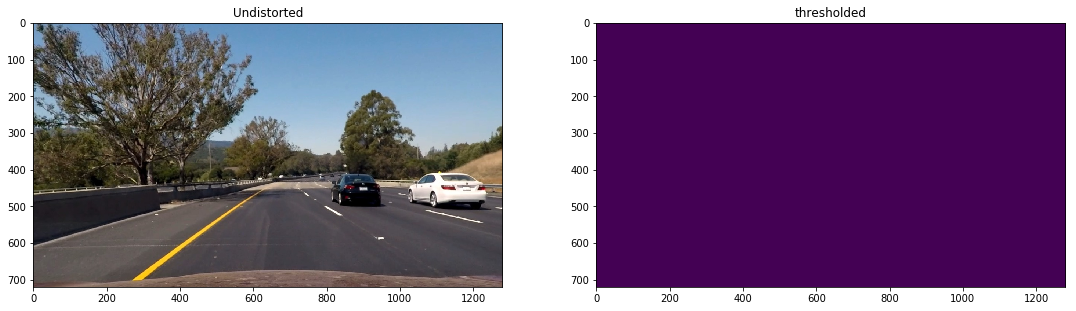

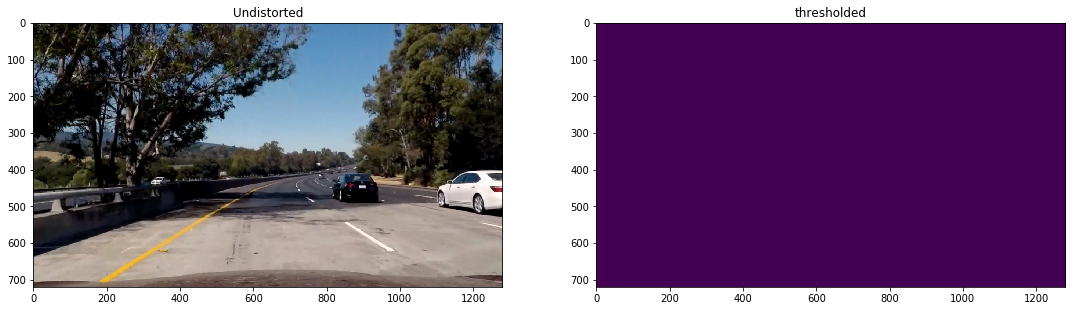

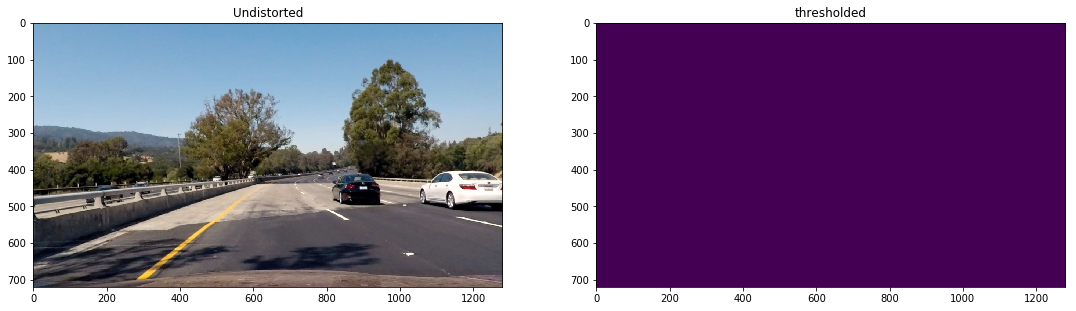

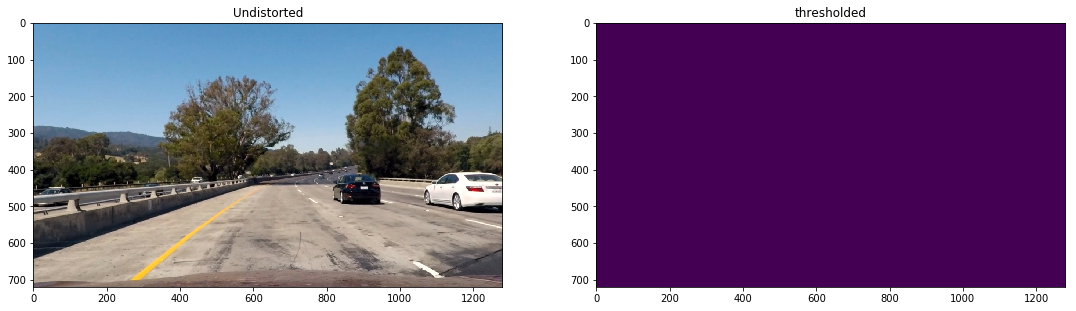

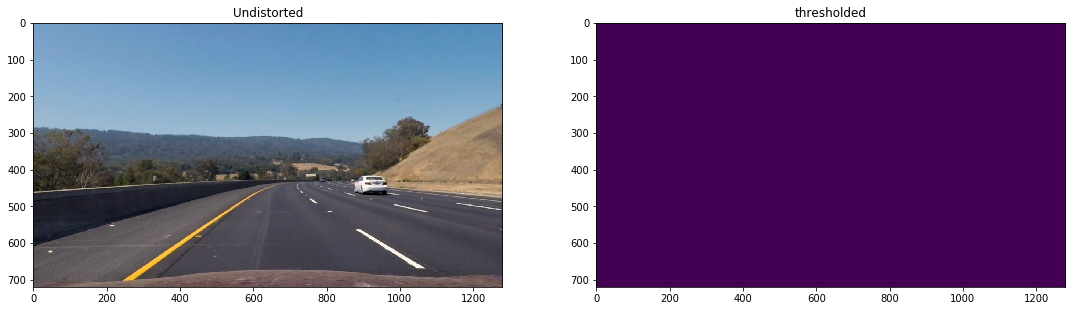

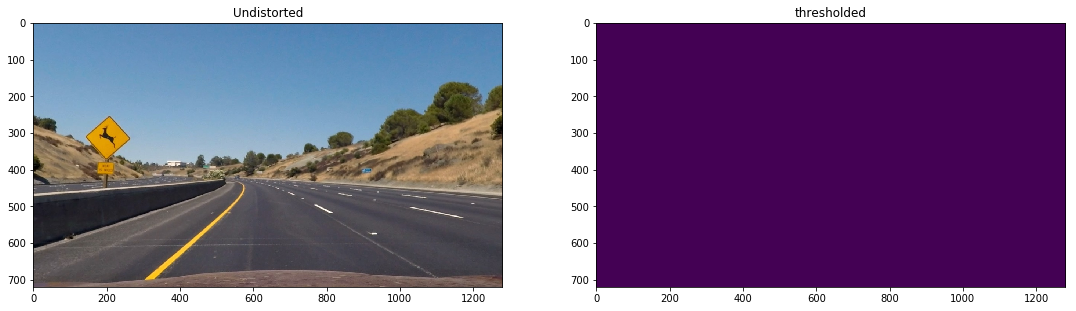

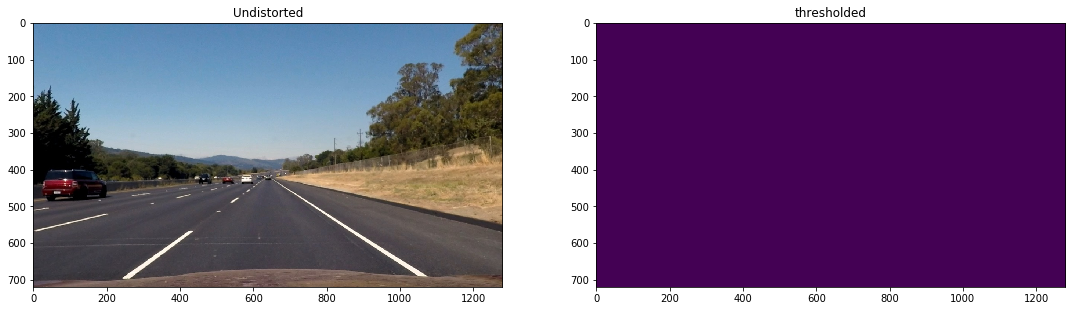

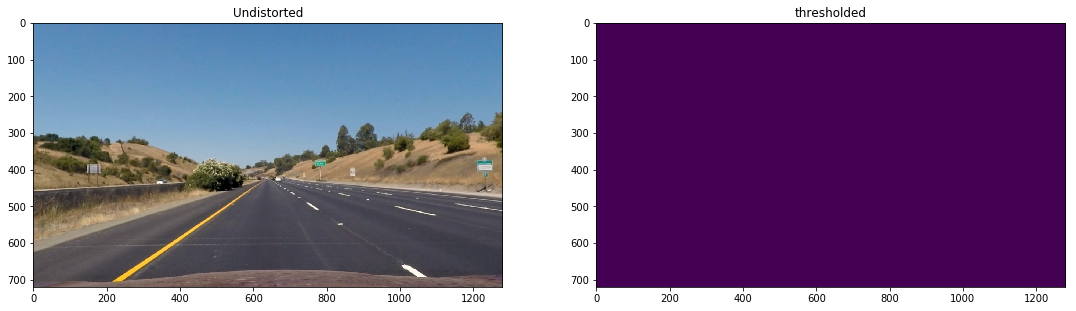

In [129]:
TEST_DIR = glob.glob("../test_images/*.jpg")
for img_link in TEST_DIR:
    f, axarr = plt.subplots(1, 2)
    img = cv2.cvtColor(cv2.imread(img_link), cv2.COLOR_BGR2RGB)
    
    # undistort 
    image = cv2.undistort(img, mtx, dist, None, mtx)
    axarr[0].imshow(image)
    axarr[0].set_title("Undistorted")
    
    #Apply a threshold with color transforms and gradients to create a thresholded binary image. 
    # Choose a Sobel kernel size
    ksize = 3 # Choose a larger odd number to smooth gradient measurements

    # Apply each of the thresholding functions
#     gradx = abs_sobel_thresh(image, orient='x', thresh_min=0, thresh_max=255)
#     grady = abs_sobel_thresh(image, orient='y', thresh_min=0, thresh_max=255)
    mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(0, 255))
    dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))
#     combined = np.zeros_like(dir_binary)
#     combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    axarr[1].imshow(mag_binary)
    axarr[1].set_title("thresholded")
    
    f.set_size_inches(18.5, 10.5, forward=True)
    f.show()

# Helper Functions

In [19]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def my_decorator(func):
    def wrapper(*args, **kwargs):
        if len(wrapper.cached_lines) < wrapper.cache_size:
            wrapper.cached_lines.extend(args[1])
        else:
            wrapper.cached_lines = wrapper.cached_lines[len(args[1])::]
            wrapper.cached_lines.extend(args[1])
        return func(img=args[0], lines=wrapper.cached_lines, **kwargs)
    wrapper.cached_lines = []
    wrapper.cache_size = 300
    return wrapper

@my_decorator
def draw_lines(image, lines, color=[255, 0, 0], thickness=7):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    
    left_x, left_y, right_x, right_y = [], [], [], []
    start_left = [0, image.shape[0]] #looking for smallest y coord, and largest x-coorest smaller than image.shape[1] /2
    start_right = [image.shape[1], image.shape[0]] # looking for smallest y coord, and largest x-coord
    for line in lines:
        for x1,y1,x2,y2 in line:
            tmp_slope = ((y2 - y1) / (x2 - x1))
            if -0.9 <= tmp_slope <= -0.3:
                left_x.append(x1)
                left_x.append(x2)
                left_y.append(y1)
                left_y.append(y2)
                if x1 > start_left[0] and y1 < start_left[1] and x1 < image.shape[1] / 2:
                    start_left[0], start_left[1] = x1, y1
                elif x2 > start_left[0] and y2 < start_left[1] and x2 < image.shape[1] / 2:
                    start_left[0], start_left[1] = x2, y2
            elif 0.3 <= tmp_slope <= 0.9:
                right_x.append(x1)
                right_x.append(x2)
                right_y.append(y1)
                right_y.append(y2)
                if x1 < start_right[0] and y1 < start_right[1] and x1 > image.shape[1] / 2 :
                    start_right[0], start_right[1] = x1, y1
                elif x2 < start_left[0] and y2 < start_left[1] and x2 > image.shape[1] / 2:
                    start_right[0], start_right[1] = x2, y2
     
    if left_x and right_x:
        # y = ax + b     (y - b) / a = x
        left_fit = np.polyfit(left_x, left_y, 1)
        right_fit = np.polyfit(right_x, right_y, 1)

        # draw start coordinates
#         left_top = (start_left[0], start_left[1])
#         right_top = (start_right[0], start_right[1])

        # Need to find left_top and right_top. Y-coordinate is the same, but x is different

        left_bot_x = int((image.shape[0] - left_fit[1]) / left_fit[0])
        right_bot_x = int((image.shape[0] - right_fit[1]) / right_fit[0])

        left_bot = (left_bot_x, image.shape[0])
        right_bot = (right_bot_x, image.shape[0])

        cv2.line(img, left_bot, left_top, color, thickness)
        cv2.line(img, right_top, right_bot, color, thickness)

        
def drawBirdsEye(image, lines, color=[255, 0, 0], thickness=7):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    
    left_x, left_y, right_x, right_y = [], [], [], []
    start_left = [0, image.shape[0]] #looking for smallest y coord, and largest x-coorest smaller than image.shape[1] /2
    start_right = [image.shape[1], image.shape[0]] # looking for smallest y coord, and largest x-coord
    for line in lines:
        for x1,y1,x2,y2 in line:
            tmp_slope = ((y2 - y1) / (x2 - x1))
            if -0.9 <= tmp_slope <= -0.3:
                left_x.append(x1)
                left_x.append(x2)
                left_y.append(y1)
                left_y.append(y2)
                if x1 > start_left[0] and y1 < start_left[1] and x1 < image.shape[1] / 2:
                    start_left[0], start_left[1] = x1, y1
                elif x2 > start_left[0] and y2 < start_left[1] and x2 < image.shape[1] / 2:
                    start_left[0], start_left[1] = x2, y2
            elif 0.3 <= tmp_slope <= 0.9:
                right_x.append(x1)
                right_x.append(x2)
                right_y.append(y1)
                right_y.append(y2)
                if x1 < start_right[0] and y1 < start_right[1] and x1 > image.shape[1] / 2 :
                    start_right[0], start_right[1] = x1, y1
                elif x2 < start_left[0] and y2 < start_left[1] and x2 > image.shape[1] / 2:
                    start_right[0], start_right[1] = x2, y2
     
    if left_x and right_x:
        left_fit = np.polyfit(left_x, left_y, 1)
        right_fit = np.polyfit(right_x, right_y, 1)

        # draw start coordinates
        # y = ax + b => (y - b) // a = x
        min_y = min(start_left[1], start_right[1])
        
        left_top_x = int((min_y - left_fit[1]) / left_fit[0])
        right_top_x = int((min_y - right_fit[1]) / right_fit[0])
        
        left_top = (left_top_x, min_y)
        right_top = (right_top_x, min_y)
        

        left_bot_x = int((image.shape[0] - left_fit[1]) / left_fit[0])
        right_bot_x = int((image.shape[0] - right_fit[1]) / right_fit[0])

        left_bot = (left_bot_x, image.shape[0])
        right_bot = (right_bot_x, image.shape[0])

        # Draw Red Dots on each of the center
#         cv2.circle(img, left_bot, radius=thickness, color)
#         cv2.circle(img, left_top, radius=thickness, color)
#         cv2.circle(img, right_bot, radius=thickness, color)
#         cv2.circle(img, right_top, radius=thickness, color)
        return [left_bot, left_top, right_bot, right_top]

    
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap, birdsEye=False):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    if lines is not None and len(lines) > 0:
        if birdsEye:
            return drawBirdsEye(line_img, lines)
        else:
            draw_lines(line_img, lines)
            return line_img


# Python 3 has support for cool math symbols.
def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows: 
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

def process_image(image):
    """
    Returns an image with lane lines drawn in
    """
    gray = grayscale(image)
    
    #define a kernel size and apply Gaussian smoothing
    blur_gray = gaussian_blur(image, kernel_size=5)
    
    # Define parameters for Canny and Apply
    val_median = np.median(image)
    std = 0.33
    low_thresh =  int(max(0, (1.0 - std) * val_median))
    high_thresh = int(min(255, (1.0 + std) * val_median))
    edges = canny(image, low_thresh, high_thresh)
    
    ## create a masked region of interest
    vertices = np.array([[(image.shape[1] * 0.1, image.shape[0]), (image.shape[1] * 0.4, image.shape[0] * 0.6), (image.shape[1] * 0.6, image.shape[0] * 0.6), (image.shape[1] * 0.9, image.shape[0])]], dtype=np.int32) 
    masked_edges = region_of_interest(edges, vertices)

    
    #Define the Hough Transform parameters
    image_hough = hough_lines(masked_edges, rho=1, theta=np.pi/180, 
                              threshold=3, min_line_len=60, max_line_gap=15)

    # Create a "color" binary image to combine with line image
    overlayed = weighted_img(image, image_hough, 0.6, 0.4)
    return overlayed

In [118]:
def birdEyesTransform(image):
    """
    Given an img, apply a "bird's eye perspective transform ino the given vertices"    
    """
    gray = grayscale(image)
    
    #define a kernel size and apply Gaussian smoothing
    blur_gray = gaussian_blur(image, kernel_size=5)
    
    # Define parameters for Canny and Apply
    val_median = np.median(image)
    std = 0.33
    low_thresh =  int(max(0, (1.0 - std) * val_median))
    high_thresh = int(min(255, (1.0 + std) * val_median))
    edges = canny(image, low_thresh, high_thresh)
    
    ## create a masked region of interest
    vertices = np.array([[(image.shape[1] * 0.1, image.shape[0]), (image.shape[1] * 0.4, image.shape[0] * 0.6), (image.shape[1] * 0.6, image.shape[0] * 0.6), (image.shape[1] * 0.9, image.shape[0])]], dtype=np.int32) 
    masked_edges = region_of_interest(edges, vertices)

    # Hough lines for Bird
    res = hough_lines(masked_edges, rho=1, theta=np.pi/180, 
                              threshold=3, min_line_len=60, max_line_gap=7, birdsEye=True)
    
    if res is not None:
        left_bot, left_top, right_bot, right_top = res
        
        # dot the image with the bird's eye source
        dottedImage, birdsEyeImage = image.copy(), image.copy()
        color=[255, 0, 0]
        cv2.circle(dottedImage, left_bot, 5, color, thickness=-1)
        cv2.circle(dottedImage, left_top, 5, color, thickness=-1)
        cv2.circle(dottedImage, right_bot, 5, color, thickness=-1)
        cv2.circle(dottedImage, right_top, 5, color, thickness=-1)
        
        # apply the perspective transform
        src = np.float32([left_bot, left_top, right_bot, right_top])

        offset = 125
        print('src', src)
        img_size =  (dottedImage.shape[1], dottedImage.shape[0])
#         dst = np.float32([[offset, offset], [img_size[0]-offset, offset],
#                                      [img_size[0]-offset, img_size[1]-offset],
#                                      [offset, img_size[1]-offset]])
        


        dst = np.float32([[offset, img_size[1] - offset], [offset, offset],
                                  [img_size[0]- offset, img_size[1]-offset],
                                 [img_size[0]-offset, offset],
                                ])
        print('dst', dst)
        M = cv2.getPerspectiveTransform(src , dst)
        print('M', M)
        birdsEyeImage = cv2.warpPerspective(dottedImage, M, img_size)
        return dottedImage, birdsEyeImage
    else:
        return None, None

    

# 3. Apply a Perspective Transform for Bird's eye view.


src [[ 167.  720.]
 [ 461.  535.]
 [1154.  720.]
 [ 834.  535.]]
dst [[ 125.  595.]
 [ 125.  125.]
 [1155.  595.]
 [1155.  125.]]
M [[-7.34339172e-01 -1.46278205e+00  1.08787743e+03]
 [ 4.92577286e-16 -2.08351157e+00  1.08143737e+03]
 [ 8.32209700e-19 -2.36622541e-03  1.00000000e+00]]
src [[ 228.  720.]
 [ 581.  480.]
 [1147.  720.]
 [ 742.  480.]]
dst [[ 125.  595.]
 [ 125.  125.]
 [1155.  595.]
 [1155.  125.]]
M [[-7.60147601e-01 -1.40940959e+00  1.10330996e+03]
 [ 9.91166850e-17 -1.61955720e+00  7.62535055e+02]
 [-0.00000000e+00 -2.33087331e-03  1.00000000e+00]]
src [[ 266.  720.]
 [ 482.  507.]
 [1139.  720.]
 [ 773.  507.]]
dst [[ 125.  595.]
 [ 125.  125.]
 [1155.  595.]
 [1155.  125.]]
M [[-9.41220382e-01 -1.26658687e+00  1.06258807e+03]
 [ 1.99625703e-16 -2.07240949e+00  1.01747191e+03]
 [-2.80615857e-19 -2.49687890e-03  1.00000000e+00]]
src [[ 216.  720.]
 [ 617.  432.]
 [1108.  720.]
 [ 661.  432.]]
dst [[ 125.  595.]
 [ 125.  125.]
 [1155.  595.]
 [1155.  125.]]
M [[-8.38762

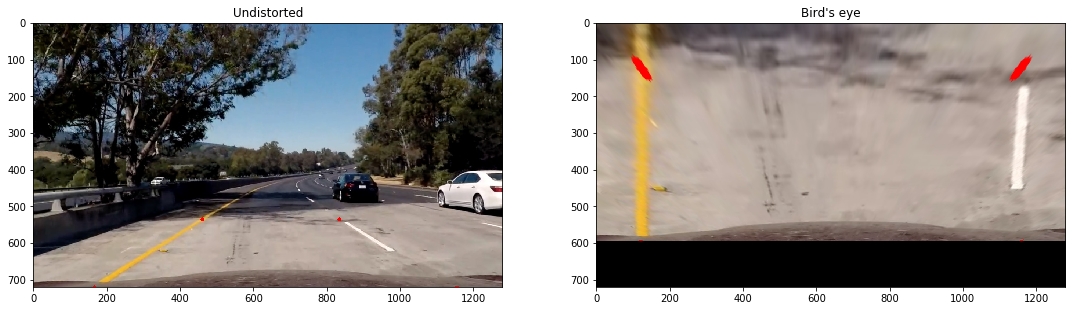

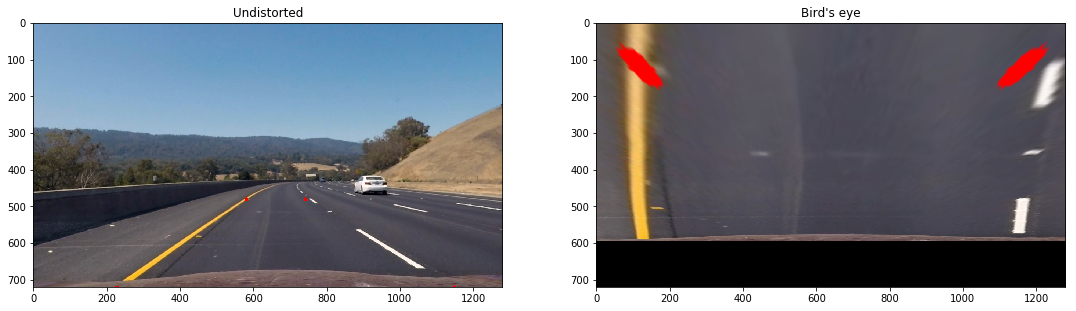

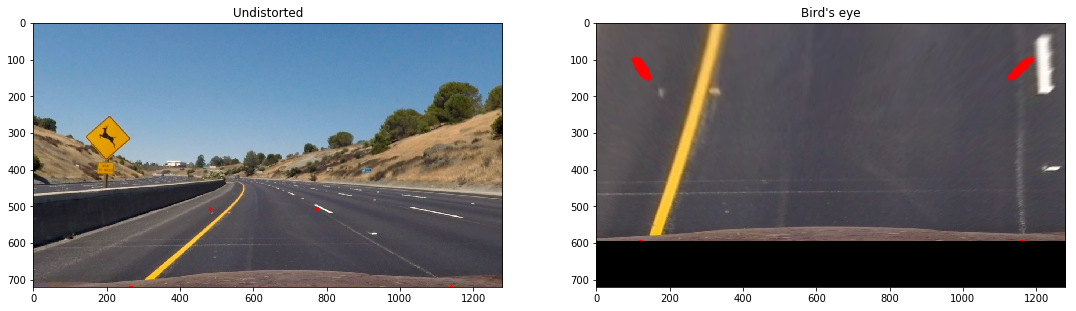

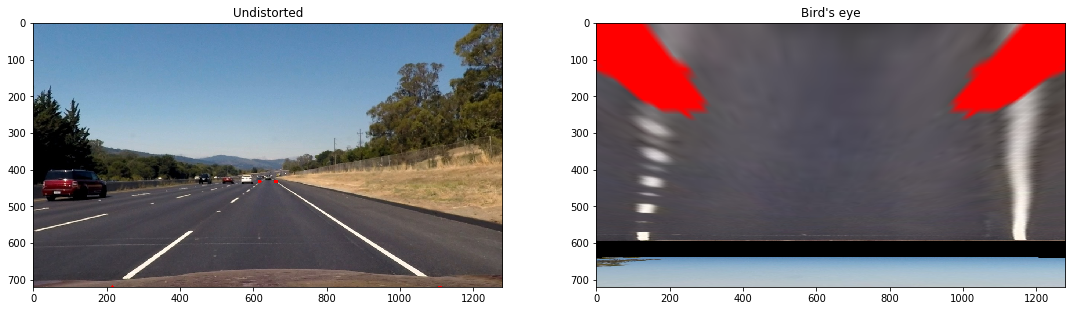

In [119]:
TEST_DIR = glob.glob("../test_images/*.jpg")
for img_link in TEST_DIR:
    img = cv2.cvtColor(cv2.imread(img_link), cv2.COLOR_BGR2RGB)
    img = cv2.undistort(img, mtx, dist, None, mtx)
    
    # birdsEyeTransform
    dottedImage, birdsEyeView = birdEyesTransform(img)
    if dottedImage is not None and birdsEyeView is not None:
        f, axarr = plt.subplots(1, 2)
        axarr[0].imshow(dottedImage)
        axarr[0].set_title("Undistorted")

        # undistort 
        axarr[1].imshow(birdsEyeView)
        axarr[1].set_title("Bird's eye")

        f.set_size_inches(18.5, 10.5, forward=True)
        f.show()